In [1]:
from Frozen_Lake import FrozenLakeEnv
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt

In [17]:
from tqdm import tqdm

In [5]:
env = FrozenLakeEnv(map_name='8x8')

### Policy iteration

In [6]:
def init_policy():
    policy = {}
    for state in env.get_all_states():
        policy[state] = {}
        for action in env.get_possible_actions(state):
            policy[state][action] = 1 / len(env.get_possible_actions(state))
            
    return policy

In [7]:
def get_q_values(values, gamma):
    q_values = {}
    for state in env.get_all_states():
        q_values[state] = {}
        for action in env.get_possible_actions(state):
            q_values[state][action] = 0
            
            for next_state in env.get_next_states(state, action):
                reward = env.get_reward(state, action, next_state)
                transition_prob = env.get_transition_prob(state, action, next_state)
                next_value = values[next_state]
                q_values[state][action] += transition_prob*(reward + gamma*next_value)
    return q_values

In [8]:
def policy_evaluation_step(policy, values, gamma):
    new_values = {}
    q_values = get_q_values(values, gamma)
    
    for state in env.get_all_states():
        new_values[state] = 0
        for action in env.get_possible_actions(state):
            new_values[state] += q_values[state][action]*policy[state][action]
            
    return new_values

In [9]:
def init_values():
    return {state: 0 for state in env.get_all_states()}

In [10]:
def policy_evaluation(policy, gamma, n_steps):
    values = init_values()
    for i in range(n_steps):
        values = policy_evaluation_step(policy, values, gamma)
    q_values = get_q_values(values, gamma)
    return q_values

In [11]:
def policy_improvement(q_values):
    new_policy = {}
    for state in env.get_all_states():
        new_policy[state] = {}
        
        max_action = None
        max_q_value = float('-inf')
        for action in env.get_possible_actions(state):
            if q_values[state][action] > max_q_value:
                max_q_value = q_values[state][action]
                max_action = action
        
        for action in env.get_possible_actions(state):
            if action == max_action:
                new_policy[state][action] = 1
            else:
                new_policy[state][action] = 0
    return new_policy

In [12]:
epochs = 50
n_steps = 100
gamma = np.linspace(0, 1, 30)

In [13]:
history = {}
for g in gamma:
    
    policy = init_policy()
    q_values = {}

    #training loop
    for _ in range(epochs):
        q_values = policy_evaluation(policy, g, n_steps)
        policy = policy_improvement(q_values)

        
    #test
    total_rewards = []
    for _ in range(1000):
        state = env.reset()
        total_reward = 0
        for _ in range(100):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)

            total_reward += reward

            if done or env.is_terminal(state):
                break
                
        total_rewards.append(total_reward)
    
    mean_total_rewards = np.mean(total_rewards)
    print(f'gamma = {g}, meat total reward = {mean_total_rewards}')
    
    history[g] = mean_total_rewards

gamma = 0.0, meat total reward = 0.0
gamma = 0.034482758620689655, meat total reward = 0.72
gamma = 0.06896551724137931, meat total reward = 0.725
gamma = 0.10344827586206896, meat total reward = 0.727
gamma = 0.13793103448275862, meat total reward = 0.68
gamma = 0.1724137931034483, meat total reward = 0.709
gamma = 0.20689655172413793, meat total reward = 0.745
gamma = 0.24137931034482757, meat total reward = 0.737
gamma = 0.27586206896551724, meat total reward = 0.678
gamma = 0.3103448275862069, meat total reward = 0.74
gamma = 0.3448275862068966, meat total reward = 0.706
gamma = 0.3793103448275862, meat total reward = 0.697
gamma = 0.41379310344827586, meat total reward = 0.703
gamma = 0.4482758620689655, meat total reward = 0.733
gamma = 0.48275862068965514, meat total reward = 0.716
gamma = 0.5172413793103449, meat total reward = 0.736
gamma = 0.5517241379310345, meat total reward = 0.698
gamma = 0.5862068965517241, meat total reward = 0.733
gamma = 0.6206896551724138, meat total

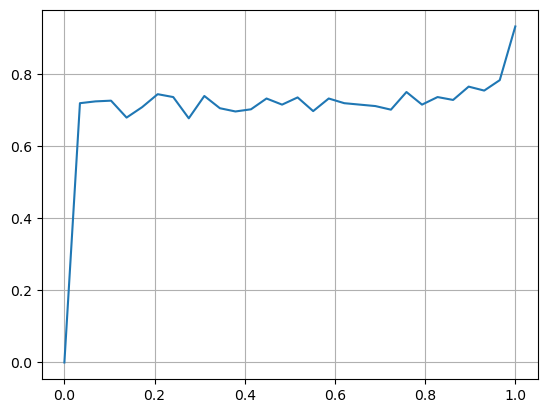

In [14]:
plt.plot(history.keys(), history.values())
plt.grid()
plt.show()

In [22]:
env = FrozenLakeEnv(map_name='8x8')
state = env.reset()
total_reward = 0

for i in range(150):
    action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
    state, reward, done, _ = env.step(action)
    
    total_reward += reward
    
    env.render()
    time.sleep(1)
    
    if done:
        break
print(f'total reward = {total_reward}')

S*FFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

S*FFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SF*FFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFF*FFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFF*FFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFF*FF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFF*F
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFF*
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFF*
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFF*
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFF*
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHF*
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFF*
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFF

In [16]:
policy

{(0, 0): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 2): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 3): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 4): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 5): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 6): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 7): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (1, 0): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 2): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (1, 3): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (1, 4): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 5): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 6): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 7): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (2, 0): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (2, 1): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (2, 2): {'left': 1, 'down':

In [23]:
epochs = 200
n_steps = 150
gamma = np.linspace(0, 1, 30)

In [24]:
history = {}
for g in tqdm(gamma):
    
    policy = init_policy()
    q_values = {}

    #training loop
    for _ in range(epochs):
        q_values = policy_evaluation(policy, g, n_steps)
        policy = policy_improvement(q_values)

        
    #test
    total_rewards = []
    for _ in range(1000):
        state = env.reset()
        total_reward = 0
        for _ in range(100):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)

            total_reward += reward

            if done or env.is_terminal(state):
                break
                
        total_rewards.append(total_reward)
    
    mean_total_rewards = np.mean(total_rewards)
    print(f'gamma = {g}, meat total reward = {mean_total_rewards}')
    
    history[g] = mean_total_rewards

  3%|██▋                                                                               | 1/30 [01:52<54:36, 112.99s/it]

gamma = 0.0, meat total reward = 0.0


  7%|█████▍                                                                            | 2/30 [03:55<55:14, 118.39s/it]

gamma = 0.034482758620689655, meat total reward = 0.699


 10%|████████▏                                                                         | 3/30 [05:58<54:15, 120.58s/it]

gamma = 0.06896551724137931, meat total reward = 0.71


 13%|██████████▉                                                                       | 4/30 [07:59<52:16, 120.64s/it]

gamma = 0.10344827586206896, meat total reward = 0.699


 17%|█████████████▋                                                                    | 5/30 [09:55<49:35, 119.03s/it]

gamma = 0.13793103448275862, meat total reward = 0.692


 20%|████████████████▍                                                                 | 6/30 [11:52<47:21, 118.39s/it]

gamma = 0.1724137931034483, meat total reward = 0.683


 23%|███████████████████▏                                                              | 7/30 [13:51<45:27, 118.57s/it]

gamma = 0.20689655172413793, meat total reward = 0.731


 27%|█████████████████████▊                                                            | 8/30 [15:50<43:35, 118.90s/it]

gamma = 0.24137931034482757, meat total reward = 0.714


 30%|████████████████████████▌                                                         | 9/30 [17:45<41:09, 117.58s/it]

gamma = 0.27586206896551724, meat total reward = 0.716


 33%|███████████████████████████                                                      | 10/30 [19:42<39:04, 117.22s/it]

gamma = 0.3103448275862069, meat total reward = 0.72


 37%|█████████████████████████████▋                                                   | 11/30 [21:42<37:28, 118.34s/it]

gamma = 0.3448275862068966, meat total reward = 0.718


 40%|████████████████████████████████▍                                                | 12/30 [23:41<35:33, 118.52s/it]

gamma = 0.3793103448275862, meat total reward = 0.727


 43%|███████████████████████████████████                                              | 13/30 [25:37<33:21, 117.74s/it]

gamma = 0.41379310344827586, meat total reward = 0.709


 47%|█████████████████████████████████████▊                                           | 14/30 [27:32<31:08, 116.78s/it]

gamma = 0.4482758620689655, meat total reward = 0.7


 50%|████████████████████████████████████████▌                                        | 15/30 [29:31<29:21, 117.42s/it]

gamma = 0.48275862068965514, meat total reward = 0.712


 53%|███████████████████████████████████████████▏                                     | 16/30 [31:28<27:22, 117.30s/it]

gamma = 0.5172413793103449, meat total reward = 0.728


 57%|█████████████████████████████████████████████▉                                   | 17/30 [33:26<25:28, 117.56s/it]

gamma = 0.5517241379310345, meat total reward = 0.741


 60%|████████████████████████████████████████████████▌                                | 18/30 [35:21<23:22, 116.86s/it]

gamma = 0.5862068965517241, meat total reward = 0.715


 63%|███████████████████████████████████████████████████▎                             | 19/30 [37:19<21:27, 117.01s/it]

gamma = 0.6206896551724138, meat total reward = 0.729


 67%|██████████████████████████████████████████████████████                           | 20/30 [39:12<19:18, 115.82s/it]

gamma = 0.6551724137931034, meat total reward = 0.676


 70%|████████████████████████████████████████████████████████▋                        | 21/30 [41:09<17:25, 116.21s/it]

gamma = 0.6896551724137931, meat total reward = 0.712


 73%|███████████████████████████████████████████████████████████▍                     | 22/30 [43:02<15:22, 115.31s/it]

gamma = 0.7241379310344828, meat total reward = 0.707


 77%|██████████████████████████████████████████████████████████████                   | 23/30 [45:00<13:32, 116.07s/it]

gamma = 0.7586206896551724, meat total reward = 0.688


 80%|████████████████████████████████████████████████████████████████▊                | 24/30 [46:54<11:32, 115.46s/it]

gamma = 0.7931034482758621, meat total reward = 0.738


 83%|███████████████████████████████████████████████████████████████████▌             | 25/30 [48:48<09:35, 115.05s/it]

gamma = 0.8275862068965517, meat total reward = 0.73


 87%|██████████████████████████████████████████████████████████████████████▏          | 26/30 [50:42<07:39, 114.87s/it]

gamma = 0.8620689655172413, meat total reward = 0.758


 90%|████████████████████████████████████████████████████████████████████████▉        | 27/30 [52:41<05:48, 116.01s/it]

gamma = 0.896551724137931, meat total reward = 0.746


 93%|███████████████████████████████████████████████████████████████████████████▌     | 28/30 [54:43<03:55, 117.88s/it]

gamma = 0.9310344827586207, meat total reward = 0.724


 97%|██████████████████████████████████████████████████████████████████████████████▎  | 29/30 [56:46<01:59, 119.37s/it]

gamma = 0.9655172413793103, meat total reward = 0.793


100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [58:40<00:00, 117.37s/it]

gamma = 1.0, meat total reward = 0.927


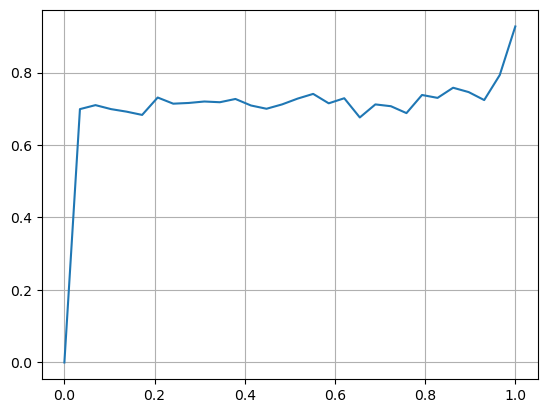

In [25]:
plt.plot(history.keys(), history.values())
plt.grid()
plt.show()

In [26]:
env = FrozenLakeEnv(map_name='8x8')
state = env.reset()
total_reward = 0

for i in range(150):
    action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
    state, reward, done, _ = env.step(action)
    
    total_reward += reward
    
    env.render()
    time.sleep(1)
    
    if done:
        break
print(f'total reward = {total_reward}')

S*FFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SF*FFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFF*FFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFF*FFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFF*FF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFF*FF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFF*F
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFF*F
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFF*
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFF*
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFF*
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFF*
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHF*
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFF*
FHHFFF

In [27]:
epochs = 200
n_steps = 150
gamma = np.linspace(0.9, 1, 20)

In [28]:
history = {}
for g in tqdm(gamma):
    
    policy = init_policy()
    q_values = {}

    #training loop
    for _ in range(epochs):
        q_values = policy_evaluation(policy, g, n_steps)
        policy = policy_improvement(q_values)

        
    #test
    total_rewards = []
    for _ in range(1000):
        state = env.reset()
        total_reward = 0
        for _ in range(100):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)

            total_reward += reward

            if done or env.is_terminal(state):
                break
                
        total_rewards.append(total_reward)
    
    mean_total_rewards = np.mean(total_rewards)
    print(f'gamma = {g}, meat total reward = {mean_total_rewards}')
    
    history[g] = mean_total_rewards

  5%|████                                                                              | 1/20 [01:59<37:54, 119.70s/it]

gamma = 0.9, meat total reward = 0.746


 10%|████████▏                                                                         | 2/20 [04:07<37:23, 124.62s/it]

gamma = 0.9052631578947369, meat total reward = 0.744


 15%|████████████▎                                                                     | 3/20 [06:19<36:14, 127.91s/it]

gamma = 0.9105263157894737, meat total reward = 0.732


 20%|████████████████▍                                                                 | 4/20 [08:36<35:05, 131.57s/it]

gamma = 0.9157894736842106, meat total reward = 0.751


 25%|████████████████████▌                                                             | 5/20 [10:39<32:03, 128.25s/it]

gamma = 0.9210526315789473, meat total reward = 0.709


 30%|████████████████████████▌                                                         | 6/20 [12:43<29:36, 126.87s/it]

gamma = 0.9263157894736842, meat total reward = 0.736


 35%|████████████████████████████▋                                                     | 7/20 [14:39<26:42, 123.27s/it]

gamma = 0.9315789473684211, meat total reward = 0.749


 40%|████████████████████████████████▊                                                 | 8/20 [16:29<23:51, 119.28s/it]

gamma = 0.9368421052631579, meat total reward = 0.765


 45%|████████████████████████████████████▉                                             | 9/20 [18:31<22:00, 120.04s/it]

gamma = 0.9421052631578948, meat total reward = 0.732


 50%|████████████████████████████████████████▌                                        | 10/20 [20:30<19:57, 119.73s/it]

gamma = 0.9473684210526316, meat total reward = 0.776


 55%|████████████████████████████████████████████▌                                    | 11/20 [22:22<17:36, 117.42s/it]

gamma = 0.9526315789473684, meat total reward = 0.778


 60%|████████████████████████████████████████████████▌                                | 12/20 [24:18<15:36, 117.03s/it]

gamma = 0.9578947368421052, meat total reward = 0.754


 65%|████████████████████████████████████████████████████▋                            | 13/20 [26:11<13:28, 115.56s/it]

gamma = 0.9631578947368421, meat total reward = 0.776


 70%|████████████████████████████████████████████████████████▋                        | 14/20 [28:02<11:26, 114.37s/it]

gamma = 0.968421052631579, meat total reward = 0.784


 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [29:52<09:24, 112.83s/it]

gamma = 0.9736842105263158, meat total reward = 0.807


 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [31:51<07:39, 114.85s/it]

gamma = 0.9789473684210527, meat total reward = 0.776


 85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [33:44<05:42, 114.12s/it]

gamma = 0.9842105263157894, meat total reward = 0.8


 90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [35:45<03:52, 116.34s/it]

gamma = 0.9894736842105263, meat total reward = 0.881


 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [37:42<01:56, 116.63s/it]

gamma = 0.9947368421052631, meat total reward = 0.939


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [39:27<00:00, 118.35s/it]

gamma = 1.0, meat total reward = 0.929


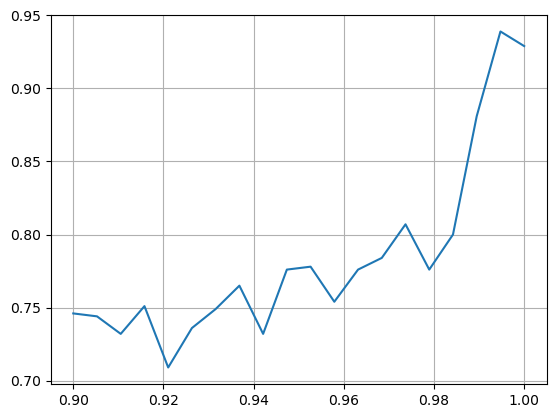

In [29]:
plt.plot(history.keys(), history.values())
plt.grid()
plt.show()

In [30]:
epochs = 200
n_steps = 150
gamma = np.linspace(0.981, 1, 10)

In [31]:
history = {}
for g in tqdm(gamma):
    
    policy = init_policy()
    q_values = {}

    #training loop
    for _ in range(epochs):
        q_values = policy_evaluation(policy, g, n_steps)
        policy = policy_improvement(q_values)

        
    #test
    total_rewards = []
    for _ in range(1000):
        state = env.reset()
        total_reward = 0
        for _ in range(100):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)

            total_reward += reward

            if done or env.is_terminal(state):
                break
                
        total_rewards.append(total_reward)
    
    mean_total_rewards = np.mean(total_rewards)
    print(f'gamma = {g}, meat total reward = {mean_total_rewards}')
    
    history[g] = mean_total_rewards

 10%|████████▏                                                                         | 1/10 [02:06<18:54, 126.02s/it]

gamma = 0.981, meat total reward = 0.775


 20%|████████████████▍                                                                 | 2/10 [04:03<16:07, 120.96s/it]

gamma = 0.983111111111111, meat total reward = 0.788


 30%|████████████████████████▌                                                         | 3/10 [06:12<14:33, 124.79s/it]

gamma = 0.9852222222222222, meat total reward = 0.786


 40%|████████████████████████████████▊                                                 | 4/10 [08:22<12:39, 126.55s/it]

gamma = 0.9873333333333333, meat total reward = 0.791


 50%|█████████████████████████████████████████                                         | 5/10 [10:40<10:53, 130.70s/it]

gamma = 0.9894444444444445, meat total reward = 0.884


 60%|█████████████████████████████████████████████████▏                                | 6/10 [12:45<08:36, 129.01s/it]

gamma = 0.9915555555555555, meat total reward = 0.879


 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [14:36<06:09, 123.10s/it]

gamma = 0.9936666666666667, meat total reward = 0.904


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [16:11<03:48, 114.05s/it]

gamma = 0.9957777777777778, meat total reward = 0.944


 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [17:51<01:49, 109.73s/it]

gamma = 0.9978888888888889, meat total reward = 0.918


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [19:24<00:00, 116.48s/it]

gamma = 1.0, meat total reward = 0.918


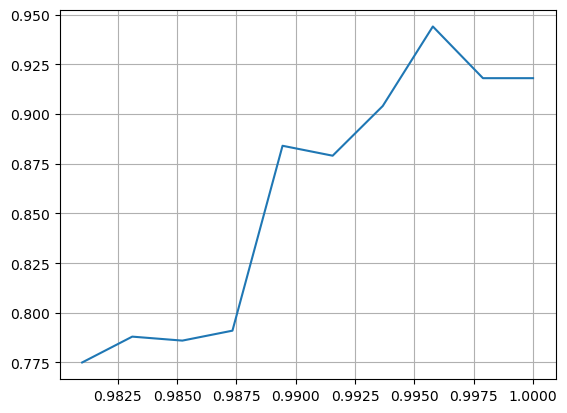

In [32]:
plt.plot(history.keys(), history.values())
plt.grid()
plt.show()

In [42]:
#refit on best gamma
total_reward_best = max(history.values())
gamma_best = [k for k, v in history.items() if v == total_reward_best]  
print(f'best gamma = {gamma_best}, best total reward = {total_reward_best}')

epochs = 200
n_steps = 150

policy = init_policy()
q_values = {}

#training loop
for _ in range(epochs):
    q_values = policy_evaluation(policy, max(gamma_best), n_steps)
    policy = policy_improvement(q_values)

best gamma = [0.9957777777777778], best total reward = 0.944


Try to initialize values not equals zeros

In [10]:
def new_policy_evaluation(policy, values, gamma, n_steps):
    #values = init_values()
    for i in range(n_steps):
        values = policy_evaluation_step(policy, values, gamma)
    q_values = get_q_values(values, gamma)
    return q_values

In [12]:
epochs = 50
evaluation_step_n = 100
gamma = 0.99

policy = init_policy()
for _ in range(epochs):
    q_values = policy_evaluation(policy, gamma, evaluation_step_n)
    policy = policy_improvement(q_values)

In [13]:
policy

{(0, 0): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 2): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 3): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 4): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 5): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 6): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (0, 7): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (1, 0): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 2): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (1, 3): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (1, 4): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 5): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 6): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (1, 7): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (2, 0): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (2, 1): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (2, 2): {'left': 1, 'down':

In [14]:
#test
history = []

for _ in range(100):
    total_rewards = []
    for _ in range(500):
        state = env.reset()
        total_reward = 0
        for _ in range(150):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)

            total_reward += reward

            if done or env.is_terminal(state):
                break

        total_rewards.append(total_reward)

    mean_total_reward = np.mean(total_rewards)
    history.append(mean_total_reward)
    print(f'mean total reward = {mean_total_reward}')

mean total reward = 0.86
mean total reward = 0.896
mean total reward = 0.884
mean total reward = 0.872
mean total reward = 0.876
mean total reward = 0.872
mean total reward = 0.896
mean total reward = 0.892
mean total reward = 0.874
mean total reward = 0.874
mean total reward = 0.888
mean total reward = 0.89
mean total reward = 0.884
mean total reward = 0.898
mean total reward = 0.88
mean total reward = 0.892
mean total reward = 0.912
mean total reward = 0.9
mean total reward = 0.87
mean total reward = 0.918
mean total reward = 0.906
mean total reward = 0.858
mean total reward = 0.91
mean total reward = 0.866
mean total reward = 0.908
mean total reward = 0.884
mean total reward = 0.864
mean total reward = 0.88
mean total reward = 0.85
mean total reward = 0.884
mean total reward = 0.886
mean total reward = 0.886
mean total reward = 0.866
mean total reward = 0.884
mean total reward = 0.894
mean total reward = 0.9
mean total reward = 0.906
mean total reward = 0.888
mean total reward = 0.9

In [16]:
print(np.mean(history))

0.884


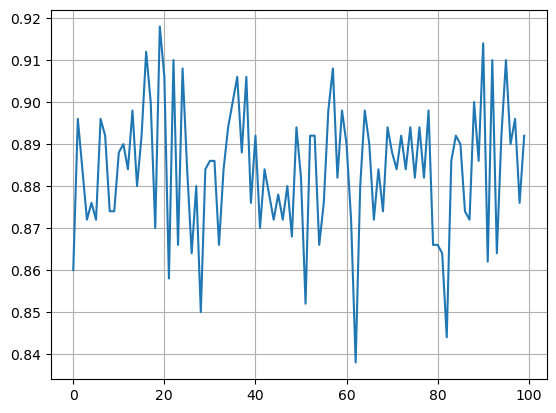

In [23]:
plt.plot(history)
plt.grid()
plt.show()

In [17]:
epochs = 50
evaluation_step_n = 100
gamma = 0.99

new_policy = init_policy()
values = init_values()

for _ in range(epochs):
    values = policy_evaluation_step(new_policy, values, gamma)    
    q_values = new_policy_evaluation(new_policy,values, gamma, evaluation_step_n)
    new_policy = policy_improvement(q_values)

In [18]:
new_policy

{(0, 0): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 2): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 3): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 4): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 5): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 6): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (0, 7): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (1, 0): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 2): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (1, 3): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (1, 4): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 5): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (1, 6): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (1, 7): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (2, 0): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (2, 1): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (2, 2): {'left': 1, 'down':

In [19]:
#test
new_history = []

for i in range(100):
    new_total_rewards = []
    for _ in range(500):
        state = env.reset()
        total_reward = 0
        for _ in range(150):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)

            total_reward += reward

            if done or env.is_terminal(state):
                break

        new_total_rewards.append(total_reward)

    new_mean_total_reward = np.mean(new_total_rewards)
    new_history.append(new_mean_total_reward)
    print(f'batch = {i}, mean total reward = {new_mean_total_reward}')

batch = 0, mean total reward = 0.896
batch = 1, mean total reward = 0.89
batch = 2, mean total reward = 0.894
batch = 3, mean total reward = 0.896
batch = 4, mean total reward = 0.878
batch = 5, mean total reward = 0.892
batch = 6, mean total reward = 0.892
batch = 7, mean total reward = 0.894
batch = 8, mean total reward = 0.898
batch = 9, mean total reward = 0.904
batch = 10, mean total reward = 0.916
batch = 11, mean total reward = 0.866
batch = 12, mean total reward = 0.888
batch = 13, mean total reward = 0.884
batch = 14, mean total reward = 0.866
batch = 15, mean total reward = 0.894
batch = 16, mean total reward = 0.888
batch = 17, mean total reward = 0.878
batch = 18, mean total reward = 0.89
batch = 19, mean total reward = 0.904
batch = 20, mean total reward = 0.894
batch = 21, mean total reward = 0.874
batch = 22, mean total reward = 0.884
batch = 23, mean total reward = 0.898
batch = 24, mean total reward = 0.898
batch = 25, mean total reward = 0.862
batch = 26, mean total r

In [21]:
print(np.mean(new_history))

0.8870599999999998


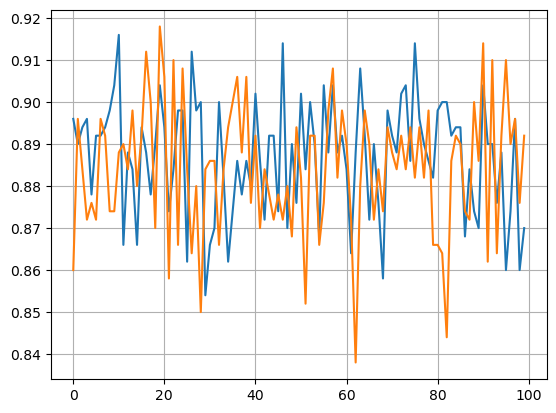

In [24]:
plt.plot(new_history)
plt.plot(history)
plt.grid()
plt.show()

Видим, что алгоритм по прежнему работет. И в среднем даже немного лучше

### Value iteration

In [9]:
def value_iteration_step(values, gamma):
    new_values = init_values()
    
    for state in env.get_all_states():
        max_v = 0
       
        for action in env.get_possible_actions(state):
            v = 0
            for next_state in env.get_next_states(state, action):
                reward = env.get_reward(state, action, next_state)
                transition_prob = env.get_transition_prob(state, action, next_state)
                v += transition_prob*(reward + gamma*values[next_state])
            
            if v >= max_v:
                max_v = v

        new_values[state] = max_v
    
    return new_values

In [14]:
#value iteration
evaluation_step_n = 500
gamma = 0.99

policy = init_policy()
values = init_values()

for i in range(evaluation_step_n):
    #q_values = get_q_values(values, gamma)
    values = value_iteration_step(values, gamma)
    
    
q_values = get_q_values(values, gamma)
policy = policy_improvement(q_values)

In [18]:
#play
total_reward = 0
state = env.reset()
for _ in range(100):
    action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
    state, reward, done, _ = env.step(action)
    
    time.sleep(2)
    env.render()
    
    total_reward += reward
    
    if done or env.is_terminal(state):
        break

print(f'total reward = {total_reward}')

S*FFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SF*FFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFF*FFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFF*FFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFF*FF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFF*F
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFF*
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFF*
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFF*
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHF*
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFF*
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFF*F
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFH*F
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHF*
FFFHFFFF
FHHFFF

In [25]:
#find gamma
iteration_steps = 1000
gamma = np.linspace(0, 1, 30)

history = {}

for g in tqdm(gamma):
    policy = init_policy()
    values = init_values()
    #train
    for i in range(iteration_steps):
        values = value_iteration_step(values, g)
    q_values = get_q_values(values, g)
    policy = policy_improvement(q_values)
    
    #test
    total_rewards = []
    for _ in range(1000):
        total_reward = 0
        state = env.reset()
        
        for _ in range(300):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)
            
            total_reward += reward
            
            if done or env.is_terminal(state):
                break
        total_rewards.append(total_reward)
        
    history[g] = np.mean(total_rewards)
    print(f'gamma = {g}, mean reward = {history[g]}')

  3%|██▊                                                                                | 1/30 [00:26<12:41, 26.27s/it]

gamma = 0.0, mean reward = 0.0


  7%|█████▌                                                                             | 2/30 [00:31<06:24, 13.72s/it]

gamma = 0.034482758620689655, mean reward = 0.728


 10%|████████▎                                                                          | 3/30 [00:36<04:22,  9.74s/it]

gamma = 0.06896551724137931, mean reward = 0.725


 13%|███████████                                                                        | 4/30 [00:40<03:19,  7.66s/it]

gamma = 0.10344827586206896, mean reward = 0.7


 17%|█████████████▊                                                                     | 5/30 [00:45<02:44,  6.57s/it]

gamma = 0.13793103448275862, mean reward = 0.714


 20%|████████████████▌                                                                  | 6/30 [00:50<02:25,  6.07s/it]

gamma = 0.1724137931034483, mean reward = 0.716


 23%|███████████████████▎                                                               | 7/30 [00:55<02:10,  5.69s/it]

gamma = 0.20689655172413793, mean reward = 0.717


 27%|██████████████████████▏                                                            | 8/30 [00:59<01:56,  5.30s/it]

gamma = 0.24137931034482757, mean reward = 0.689


 30%|████████████████████████▉                                                          | 9/30 [01:04<01:48,  5.16s/it]

gamma = 0.27586206896551724, mean reward = 0.714


 33%|███████████████████████████▎                                                      | 10/30 [01:09<01:40,  5.03s/it]

gamma = 0.3103448275862069, mean reward = 0.7


 37%|██████████████████████████████                                                    | 11/30 [01:13<01:31,  4.83s/it]

gamma = 0.3448275862068966, mean reward = 0.714


 40%|████████████████████████████████▊                                                 | 12/30 [01:18<01:26,  4.83s/it]

gamma = 0.3793103448275862, mean reward = 0.73


 43%|███████████████████████████████████▌                                              | 13/30 [01:23<01:22,  4.86s/it]

gamma = 0.41379310344827586, mean reward = 0.709


 47%|██████████████████████████████████████▎                                           | 14/30 [01:27<01:15,  4.72s/it]

gamma = 0.4482758620689655, mean reward = 0.707


 50%|█████████████████████████████████████████                                         | 15/30 [01:32<01:09,  4.63s/it]

gamma = 0.48275862068965514, mean reward = 0.714


 53%|███████████████████████████████████████████▋                                      | 16/30 [01:37<01:05,  4.67s/it]

gamma = 0.5172413793103449, mean reward = 0.718


 57%|██████████████████████████████████████████████▍                                   | 17/30 [01:41<01:01,  4.71s/it]

gamma = 0.5517241379310345, mean reward = 0.716


 60%|█████████████████████████████████████████████████▏                                | 18/30 [01:46<00:55,  4.62s/it]

gamma = 0.5862068965517241, mean reward = 0.724


 63%|███████████████████████████████████████████████████▉                              | 19/30 [01:51<00:51,  4.67s/it]

gamma = 0.6206896551724138, mean reward = 0.697


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [01:55<00:46,  4.66s/it]

gamma = 0.6551724137931034, mean reward = 0.725


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [02:00<00:41,  4.57s/it]

gamma = 0.6896551724137931, mean reward = 0.726


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [02:04<00:36,  4.62s/it]

gamma = 0.7241379310344828, mean reward = 0.734


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [02:09<00:32,  4.58s/it]

gamma = 0.7586206896551724, mean reward = 0.716


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [02:13<00:27,  4.53s/it]

gamma = 0.7931034482758621, mean reward = 0.719


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [02:18<00:23,  4.60s/it]

gamma = 0.8275862068965517, mean reward = 0.726


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [02:23<00:18,  4.73s/it]

gamma = 0.8620689655172413, mean reward = 0.755


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [02:28<00:14,  4.67s/it]

gamma = 0.896551724137931, mean reward = 0.726


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [02:32<00:09,  4.72s/it]

gamma = 0.9310344827586207, mean reward = 0.781


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [02:37<00:04,  4.82s/it]

gamma = 0.9655172413793103, mean reward = 0.792


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:53<00:00,  5.78s/it]

gamma = 1.0, mean reward = 0.87


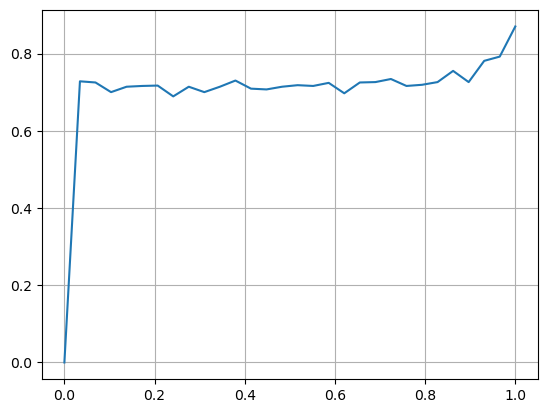

In [26]:
plt.plot(history.keys(), history.values())
plt.grid()
plt.show()

In [27]:
#find gamma
iteration_steps = 1000
gamma = np.linspace(0.9, 1, 30)

history = {}

for g in tqdm(gamma):
    policy = init_policy()
    values = init_values()
    #train
    for i in range(iteration_steps):
        values = value_iteration_step(values, g)
    q_values = get_q_values(values, g)
    policy = policy_improvement(q_values)
    
    #test
    total_rewards = []
    for _ in range(1000):
        total_reward = 0
        state = env.reset()
        
        for _ in range(300):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)
            
            total_reward += reward
            
            if done or env.is_terminal(state):
                break
        total_rewards.append(total_reward)
        
    history[g] = np.mean(total_rewards)
    print(f'gamma = {g}, mean reward = {history[g]}')

  3%|██▊                                                                                | 1/30 [00:04<02:17,  4.73s/it]

gamma = 0.9, mean reward = 0.74


  7%|█████▌                                                                             | 2/30 [00:09<02:19,  4.97s/it]

gamma = 0.903448275862069, mean reward = 0.755


 10%|████████▎                                                                          | 3/30 [00:15<02:16,  5.07s/it]

gamma = 0.906896551724138, mean reward = 0.749


 13%|███████████                                                                        | 4/30 [00:19<02:05,  4.82s/it]

gamma = 0.9103448275862069, mean reward = 0.743


 17%|█████████████▊                                                                     | 5/30 [00:24<02:01,  4.87s/it]

gamma = 0.9137931034482759, mean reward = 0.742


 20%|████████████████▌                                                                  | 6/30 [00:29<01:58,  4.96s/it]

gamma = 0.9172413793103449, mean reward = 0.745


 23%|███████████████████▎                                                               | 7/30 [00:34<01:54,  4.96s/it]

gamma = 0.9206896551724139, mean reward = 0.732


 27%|██████████████████████▏                                                            | 8/30 [00:38<01:45,  4.80s/it]

gamma = 0.9241379310344828, mean reward = 0.759


 30%|████████████████████████▉                                                          | 9/30 [00:43<01:41,  4.82s/it]

gamma = 0.9275862068965517, mean reward = 0.743


 33%|███████████████████████████▎                                                      | 10/30 [00:48<01:36,  4.85s/it]

gamma = 0.9310344827586207, mean reward = 0.743


 37%|██████████████████████████████                                                    | 11/30 [00:53<01:30,  4.78s/it]

gamma = 0.9344827586206896, mean reward = 0.741


 40%|████████████████████████████████▊                                                 | 12/30 [00:58<01:26,  4.83s/it]

gamma = 0.9379310344827586, mean reward = 0.781


 43%|███████████████████████████████████▌                                              | 13/30 [01:03<01:23,  4.93s/it]

gamma = 0.9413793103448276, mean reward = 0.728


 47%|██████████████████████████████████████▎                                           | 14/30 [01:08<01:17,  4.84s/it]

gamma = 0.9448275862068966, mean reward = 0.756


 50%|█████████████████████████████████████████                                         | 15/30 [01:12<01:11,  4.76s/it]

gamma = 0.9482758620689655, mean reward = 0.775


 53%|███████████████████████████████████████████▋                                      | 16/30 [01:17<01:08,  4.88s/it]

gamma = 0.9517241379310345, mean reward = 0.786


 57%|██████████████████████████████████████████████▍                                   | 17/30 [01:22<01:04,  4.92s/it]

gamma = 0.9551724137931035, mean reward = 0.771


 60%|█████████████████████████████████████████████████▏                                | 18/30 [01:27<00:58,  4.87s/it]

gamma = 0.9586206896551724, mean reward = 0.791


 63%|███████████████████████████████████████████████████▉                              | 19/30 [01:32<00:54,  4.93s/it]

gamma = 0.9620689655172414, mean reward = 0.778


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [01:37<00:49,  4.96s/it]

gamma = 0.9655172413793104, mean reward = 0.783


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [01:42<00:45,  5.03s/it]

gamma = 0.9689655172413794, mean reward = 0.783


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [01:47<00:39,  4.99s/it]

gamma = 0.9724137931034482, mean reward = 0.793


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [01:52<00:34,  4.91s/it]

gamma = 0.9758620689655173, mean reward = 0.797


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [01:57<00:30,  5.00s/it]

gamma = 0.9793103448275862, mean reward = 0.786


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [02:02<00:24,  4.99s/it]

gamma = 0.9827586206896551, mean reward = 0.79


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [02:07<00:19,  4.97s/it]

gamma = 0.9862068965517241, mean reward = 0.785


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [02:13<00:15,  5.18s/it]

gamma = 0.9896551724137931, mean reward = 0.89


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [02:19<00:10,  5.42s/it]

gamma = 0.993103448275862, mean reward = 0.869


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [02:26<00:06,  6.09s/it]

gamma = 0.996551724137931, mean reward = 0.996


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:42<00:00,  5.43s/it]

gamma = 1.0, mean reward = 0.842


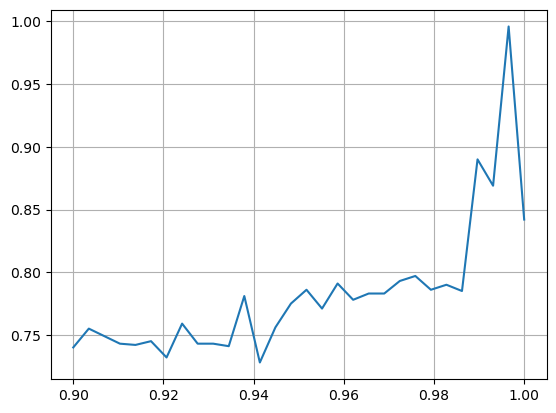

In [28]:
plt.plot(history.keys(), history.values())
plt.grid()
plt.show()

In [29]:
#find gamma
iteration_steps = 1000
gamma = np.linspace(0.98, 1, 30)

history = {}

for g in tqdm(gamma):
    policy = init_policy()
    values = init_values()
    #train
    for i in range(iteration_steps):
        values = value_iteration_step(values, g)
    q_values = get_q_values(values, g)
    policy = policy_improvement(q_values)
    
    #test
    total_rewards = []
    for _ in range(1000):
        total_reward = 0
        state = env.reset()
        
        for _ in range(300):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)
            
            total_reward += reward
            
            if done or env.is_terminal(state):
                break
        total_rewards.append(total_reward)
        
    history[g] = np.mean(total_rewards)
    print(f'gamma = {g}, mean reward = {history[g]}')

  3%|██▊                                                                                | 1/30 [00:05<02:28,  5.11s/it]

gamma = 0.98, mean reward = 0.796


  7%|█████▌                                                                             | 2/30 [00:09<02:13,  4.77s/it]

gamma = 0.9806896551724138, mean reward = 0.797


 10%|████████▎                                                                          | 3/30 [00:15<02:16,  5.06s/it]

gamma = 0.9813793103448276, mean reward = 0.8


 13%|███████████                                                                        | 4/30 [00:20<02:11,  5.05s/it]

gamma = 0.9820689655172413, mean reward = 0.819


 17%|█████████████▊                                                                     | 5/30 [00:24<02:00,  4.83s/it]

gamma = 0.9827586206896551, mean reward = 0.789


 20%|████████████████▌                                                                  | 6/30 [00:29<01:55,  4.81s/it]

gamma = 0.983448275862069, mean reward = 0.804


 23%|███████████████████▎                                                               | 7/30 [00:34<01:53,  4.95s/it]

gamma = 0.9841379310344828, mean reward = 0.792


 27%|██████████████████████▏                                                            | 8/30 [00:39<01:49,  4.96s/it]

gamma = 0.9848275862068966, mean reward = 0.82


 30%|████████████████████████▉                                                          | 9/30 [00:44<01:44,  4.96s/it]

gamma = 0.9855172413793103, mean reward = 0.806


 33%|███████████████████████████▎                                                      | 10/30 [00:49<01:40,  5.03s/it]

gamma = 0.9862068965517241, mean reward = 0.787


 37%|██████████████████████████████                                                    | 11/30 [00:54<01:36,  5.05s/it]

gamma = 0.9868965517241379, mean reward = 0.8


 40%|████████████████████████████████▊                                                 | 12/30 [00:59<01:30,  5.04s/it]

gamma = 0.9875862068965517, mean reward = 0.784


 43%|███████████████████████████████████▌                                              | 13/30 [01:05<01:27,  5.12s/it]

gamma = 0.9882758620689656, mean reward = 0.796


 47%|██████████████████████████████████████▎                                           | 14/30 [01:11<01:26,  5.40s/it]

gamma = 0.9889655172413793, mean reward = 0.895


 50%|█████████████████████████████████████████                                         | 15/30 [01:16<01:22,  5.48s/it]

gamma = 0.9896551724137931, mean reward = 0.887


 53%|███████████████████████████████████████████▋                                      | 16/30 [01:22<01:17,  5.55s/it]

gamma = 0.9903448275862069, mean reward = 0.882


 57%|██████████████████████████████████████████████▍                                   | 17/30 [01:27<01:10,  5.44s/it]

gamma = 0.9910344827586207, mean reward = 0.878


 60%|█████████████████████████████████████████████████▏                                | 18/30 [01:33<01:05,  5.48s/it]

gamma = 0.9917241379310344, mean reward = 0.873


 63%|███████████████████████████████████████████████████▉                              | 19/30 [01:38<01:00,  5.50s/it]

gamma = 0.9924137931034482, mean reward = 0.876


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [01:44<00:56,  5.63s/it]

gamma = 0.993103448275862, mean reward = 0.887


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [01:51<00:54,  6.05s/it]

gamma = 0.9937931034482759, mean reward = 0.992


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [01:58<00:51,  6.39s/it]

gamma = 0.9944827586206897, mean reward = 0.997


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [02:06<00:46,  6.66s/it]

gamma = 0.9951724137931034, mean reward = 0.995


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [02:13<00:41,  6.89s/it]

gamma = 0.9958620689655172, mean reward = 0.994


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [02:20<00:34,  6.96s/it]

gamma = 0.996551724137931, mean reward = 0.992


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [02:28<00:28,  7.10s/it]

gamma = 0.9972413793103448, mean reward = 0.994


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [02:35<00:21,  7.25s/it]

gamma = 0.9979310344827587, mean reward = 0.995


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [02:43<00:14,  7.28s/it]

gamma = 0.9986206896551724, mean reward = 0.996


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [02:50<00:07,  7.26s/it]

gamma = 0.9993103448275862, mean reward = 0.996


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:06<00:00,  6.20s/it]

gamma = 1.0, mean reward = 0.85


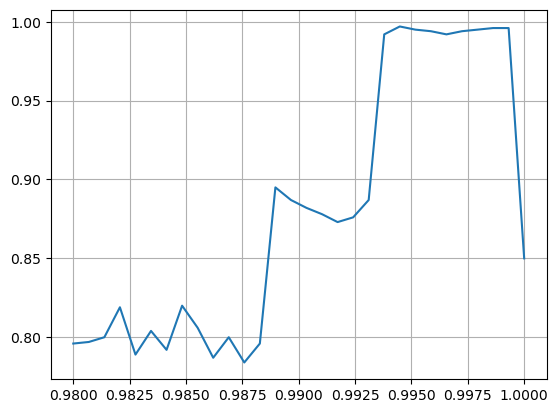

In [30]:
plt.plot(history.keys(), history.values())
plt.grid()
plt.show()

In [33]:
#refit on best gamma
total_reward_best = max(history.values())
gamma_best = [k for k, v in history.items() if v == total_reward_best]  
print(f'best gamma = {gamma_best}, best total reward = {total_reward_best}')

n_steps = 1000

policy = init_policy()
values = init_values()
gamma = max(gamma_best)

#training loop
for _ in range(n_steps):
    values = value_iteration_step(values, gamma)
    
q_values = get_q_values(values, gamma)
policy = policy_improvement(q_values)

best gamma = [0.9944827586206897], best total reward = 0.997


In [35]:
#play
total_reward = 0
state = env.reset()

for _ in range(300):
    action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
    state, reward, done, _ = env.step(action)

    total_reward += reward

    env.render()
    time.sleep(2)
    
    if done or env.is_terminal(state):
        break

print(f'mean reward = {total_reward}')

S*FFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SF*FFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FF*FFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SF*FFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFF*FFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFF*FFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFF*FF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFF*F
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFF*FF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFF*FF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFF*FF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHF*FF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFFFF
FFFHFF*F
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

SFFFFFFF
FFFFFF*F
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFF

### Compair algorithms

In [36]:
#=====================================================================
#policy iteration

In [12]:
def policy_evaluation_step(policy, values, gamma):
    new_values = {}
    q_values = get_q_values(values, gamma)
    
    for state in env.get_all_states():
        new_values[state] = 0
        for action in env.get_possible_actions(state):
            new_values[state] += q_values[state][action]*policy[state][action]
            
    return new_values

In [13]:
def init_values():
    return {state: 0 for state in env.get_all_states()}

In [14]:
def policy_evaluation(policy, gamma, n_steps):
    values = init_values()
    for i in range(n_steps):
        values = policy_evaluation_step(policy, values, gamma)
    q_values = get_q_values(values, gamma)
    return q_values

In [15]:
epochs = 200
evaluation_steps = 300
gamma = 0.99

pi_policy = init_policy()
for _ in range(epochs):
    pi_q_values = policy_evaluation(pi_policy, gamma, evaluation_steps)
    pi_policy = policy_improvement(pi_q_values)

In [17]:
#test policy iteration
pi_counts = []
total_rewards = []
for _ in range(1000):
    state = env.reset()
    total_reward = 0
    count = 0
    for i in range(300):
        action = np.random.choice(env.get_possible_actions(state), p=list(pi_policy[state].values()))
        state, reward, done, _ = env.step(action)

        total_reward += reward
        count += 1
        
        if done or env.is_terminal(state):
            break
            
    pi_counts.append(count)
    total_rewards.append(total_reward)
    
mean_total_rewards = np.mean(total_rewards)
print(f'meat total reward = {mean_total_rewards}')

meat total reward = 0.879


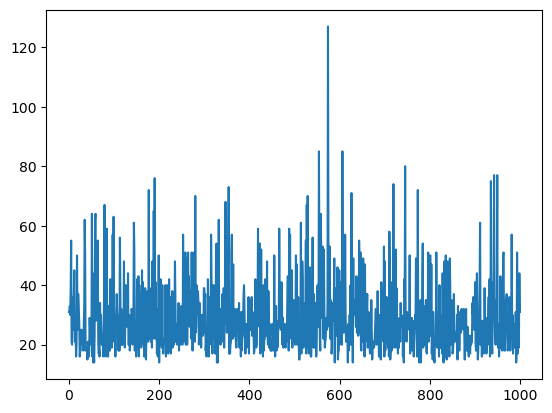

In [18]:
plt.plot(pi_counts)
plt.show()

In [41]:
#==================================================
#value iteration

In [23]:
#value iteration
evaluation_step_n = 15000 #15000
gamma = 0.99

vi_policy = init_policy()
vi_values = init_values()

for i in range(evaluation_step_n):
    #q_values = get_q_values(values, gamma)
    vi_values = value_iteration_step(vi_values, gamma)
    
    
vi_q_values = get_q_values(vi_values, gamma)
vi_policy = policy_improvement(vi_q_values)

По времени обучается гораздо быстрее, при этом дает немного лучшее качество

In [29]:
#test value iteration
vi_counts = []
tot_rewards = []
for _ in range(1000):
    state = env.reset()
    total_reward = 0
    count = 0
    for _ in range(300):
        action = np.random.choice(env.get_possible_actions(state), p=list(vi_policy[state].values()))
        state, reward, done, _ = env.step(action)
        total_reward += reward
        count += 1
        
        if done or env.is_terminal(state):
            break
    vi_counts.append(count)
    tot_rewards.append(total_reward)
    
mean_total_rewards = np.mean(tot_rewards)
print(f'meat total reward = {mean_total_rewards}')

meat total reward = 0.878


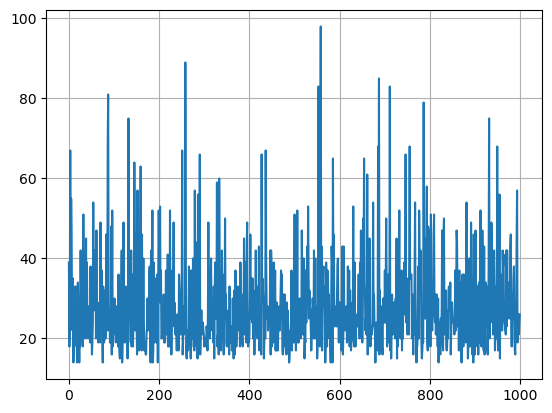

In [30]:
plt.plot(vi_counts)
plt.grid()
plt.show()

In [21]:
#test value iteration
vi_counts = []
tot_rewards = []
for _ in range(1000):
    state = env.reset()
    total_reward = 0
    count = 0
    for _ in range(300):
        action = np.random.choice(env.get_possible_actions(state), p=list(vi_policy[state].values()))
        state, reward, done, _ = env.step(action)
        total_reward += reward
        count += 1
        
        if done or env.is_terminal(state):
            break
    vi_counts.append(count)
    tot_rewards.append(total_reward)
    
mean_total_rewards = np.mean(tot_rewards)
print(f'meat total reward = {mean_total_rewards}')

meat total reward = 0.886


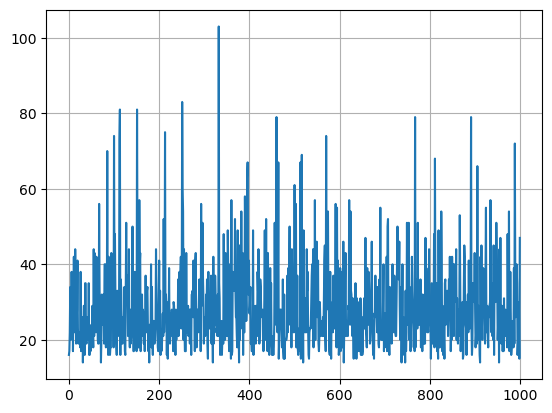

In [22]:
plt.plot(vi_counts)
plt.grid()
plt.show()

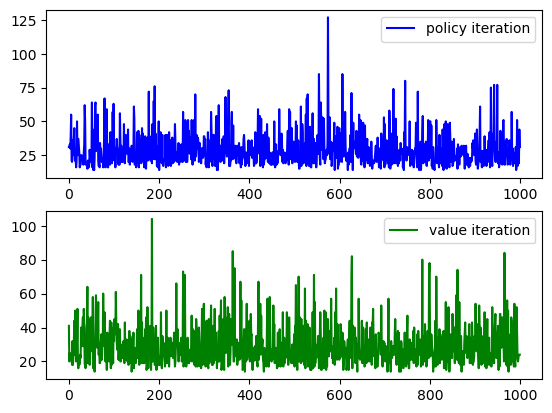

In [27]:
fig, ax = plt.subplots(2,1)
ax[0].plot(pi_counts, color='blue', label='policy iteration')
ax[1].plot(vi_counts, color='green', label='value iteration')

for a in ax.flat:
    a.legend()
plt.show()

In [28]:
print(f'Policy iteration mean count of calls = {np.mean(pi_counts)}')
print(f'Value iteration mean count of calls = {np.mean(vi_counts)}')

Policy iteration mean count of calls = 28.895
Value iteration mean count of calls = 29.369
